In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# **Data Loading**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.

In [2]:
data_fraud=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#shape of the data set. 
data_fraud.shape      ##total number of rows and column in training dataset.

(284807, 31)

In [4]:
#Total number of NULL Values in the data 
data_fraud.isnull().sum()                            #how many null values are there in data_fraud
        
#so as a result, there are No null values in the o data_fraud set.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Exploratory Data Analysis (EDA)**
EDA stands for Exploratory Data Analysis. It is a critical step in the data analysis process that involves examining and visualizing data sets to understand their main characteristics, patterns, and relationships. The primary goal of EDA is to gain insights, detect anomalies, and inform the data modeling process.

# **1. Summarize Data:**

This involves calculating descriptive statistics such as **mean, median, mode, standard deviation,** and other relevant measures to understand the central tendency and spread of the data.

In [5]:
data_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data_fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#information about the dataset 
data_fraud.info()                 #There are total 31 features
                           
# All the features are  having numrical data type with no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data_fraud.describe()     #The data_fraud.describe method provides a statistical summary 
                         #of the numerical columns in the data DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data_fraud['Class'].value_counts()[0]/len(data_fraud) * 100,2), '% of the dataset')
print('Frauds', round(data_fraud['Class'].value_counts()[1]/len(data_fraud) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note**: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

# **2. Visualisation and Insights**
Data Visualisation: Data visualization refers to the graphical representation of data and information using visual elements such as **charts, graphs, and maps**. The primary goal of data visualization is to present complex datasets in a visually appealing and easy-to-understand format

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

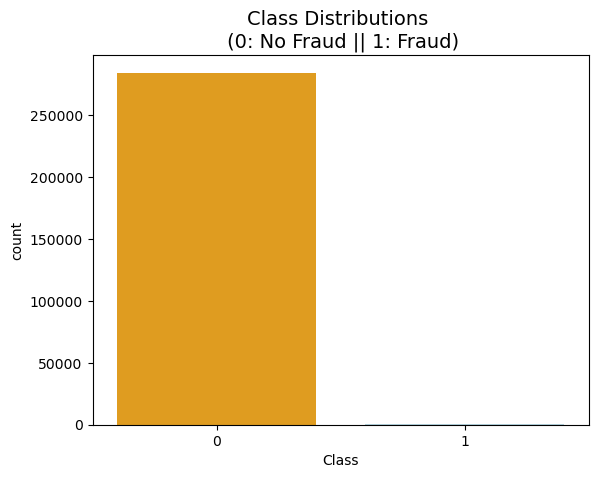

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FFA500", "#ADD8E6"]

sns.countplot(x='Class', data=data_fraud, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

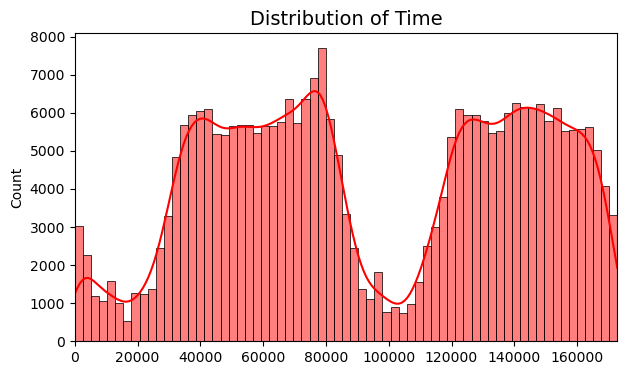

In [11]:
fig, ax = plt.subplots(1, figsize=(7, 4))  # Create a figure and axis

time_val = data_fraud['Time'].values

sns.histplot(time_val, ax=ax, color='r',kde='True')  # Use the 'ax' parameter to specify the axis
ax.set_title('Distribution of Time', fontsize=14)  # Set title for the axis
ax.set_xlim([min(time_val), max(time_val)])  # Set x-axis limits

plt.show()  # Show the plot


**Scaling and Distributing**

In this phase of our kernel, we will first scale the columns comprise of **Time and Amount** . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not

make a sub-sample which will contian the scaled_time and scaled_amount.

In [12]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data_fraud['scaled_amount'] = rob_scaler.fit_transform(data_fraud['Amount'].values.reshape(-1,1))
data_fraud['scaled_time'] = rob_scaler.fit_transform(data_fraud['Time'].values.reshape(-1,1))

data_fraud.drop(['Time','Amount'], axis=1, inplace=True)
data_fraud


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


# **Resampling Techniques:**

Dealing with **imbalanced datasets** is a common challenge in machine learning, especially in scenarios where one class has **significantly fewer samples than the other(s)**. Imbalanced datasets can lead to **biased model performance** and inaccurate predictions, as models tend to favor the majority class. Here are several strategies to address imbalanced datasets

In [13]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

data_fraud = data_fraud.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data_fraud.loc[data_fraud['Class'] == 1]
non_fraud_df =data_fraud.loc[data_fraud['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
81042,-0.306231,0.033811,1.684815,-1.149371,-0.800581,-0.805059,0.086194,0.005790,-1.274462,0.149180,...,0.664775,-0.010622,0.587973,-0.130572,-0.249142,0.055531,0.058146,0,0.183749,-0.304585
151196,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,-0.357616,...,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1,7.678055,0.120537
123249,-0.556373,0.784859,1.704390,0.963344,0.354951,-0.527152,0.569132,-0.038343,-0.788850,-0.330212,...,0.443528,0.008180,0.411417,-0.309467,-0.410353,0.170465,0.159257,0,-0.028086,-0.092001
102441,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,...,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1,-0.293440,-0.193670
178208,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,-4.891156,...,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,1,0.328513,0.456220


In [14]:
new_df.shape

(984, 31)

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


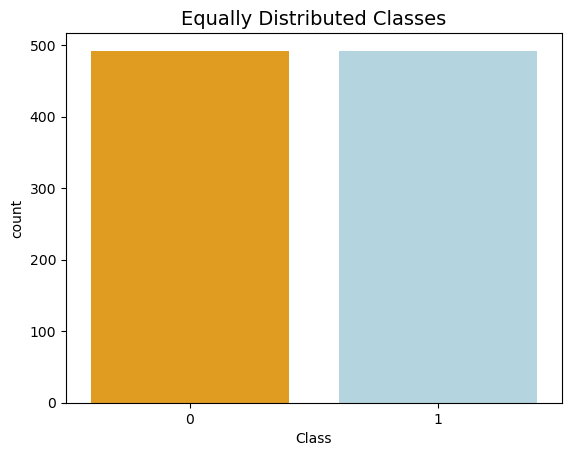

In [15]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# **Splitting**  the Data set into Train and Test

In [16]:
from sklearn.model_selection import train_test_split

X=new_df.drop('Class',axis=1)
y=new_df['Class']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# **Train the model:**

Hyper Parameter tuning :Hyperparameter tuning, also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for a machine learning model to achieve optimal performance on a given dataset

There are two main hyperparameter tuning techniques:

GridSearchCV
RandomizedSearchCV

# **1.LogisticRegression Model**

The Logistic Regression model calculates the probability that an instance belongs to a specific class (e.g., class 1) based on its features. The predicted probability is then converted into a binary decision (class 0 or 1) using a threshold.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
baseline_model = LogisticRegression(max_iter=1000)

#Hyperparameter tuning
param_grid = {'C': [0.1, 1]}
grid_search = GridSearchCV(baseline_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_  # we get the logisticRegression model with the best parameters
baseline_model=grid_search.fit(X_train, y_train)
#baseline_model.fit(X_train, y_train)
# Model evaluation
y_pred = baseline_model.predict(X_test)  # Evaluate on a smaller sample
print("Baseline Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Baseline Model:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.92      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

[[ 86   1]
 [  9 101]]


# **ROC & AUC**
Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC) widely used evaluation metrics for binary classification models. They help assess the performance of the model and its ability to discriminate between the two classes effectively.

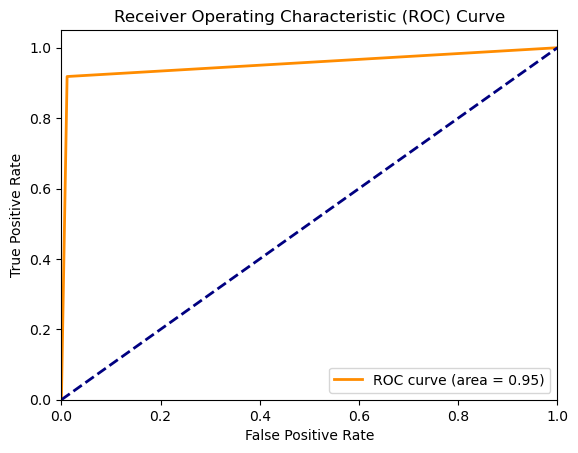

AUC Score: 0.9533437826541274


In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)


# **2. KNeighborsClassifier Model**

In [21]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Baseline model
knn_model = KNeighborsClassifier()

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7]}  
grid_search = GridSearchCV(knn_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_  # Get the KNeighborsClassifier with the best parameters

# Model evaluation
y_pred = baseline_model.predict(X_test)  
print(" KNN Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

 KNN Model:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.92      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

[[ 86   1]
 [  9 101]]


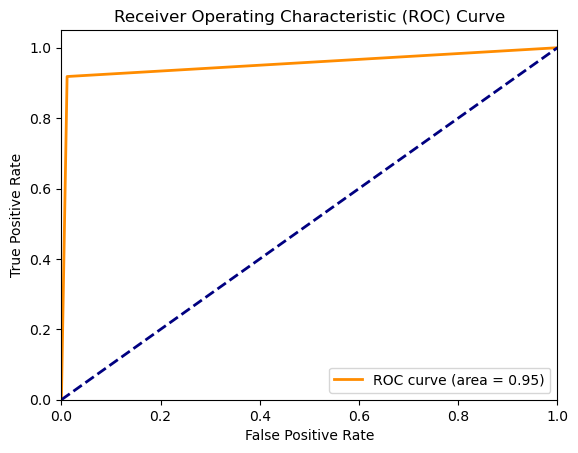

AUC Score: 0.9533437826541274


In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)


# **3. SVMClassifier Model**

In [24]:
# Baseline model
svm_model = SVC()

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  
grid_search = GridSearchCV(svm_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_  # Get the SVM model with the best parameters

# Model evaluation
y_pred = baseline_model.predict(X_test)  # Evaluate on a smaller sample
print(" SVM Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



 SVM Model:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.92      0.95       110

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

[[ 86   1]
 [  9 101]]


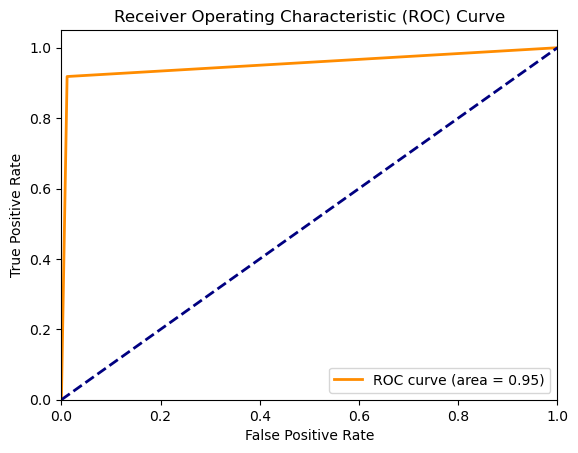

AUC Score: 0.9533437826541274


In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)


# **4. DecisionTreeClassifier Model**

In [26]:
# DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Hyperparameter tuning
param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]} 
grid_search = GridSearchCV(dt_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

baseline_model = grid_search.best_estimator_  # Get the DecisionTreeClassifier with the best parameters

# Model evaluation
y_pred = baseline_model.predict(X_test)  # Evaluate on a smaller sample
print(" Decision Tree Model:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))





 Decision Tree Model:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.97      0.92      0.94       110

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

[[ 84   3]
 [  9 101]]


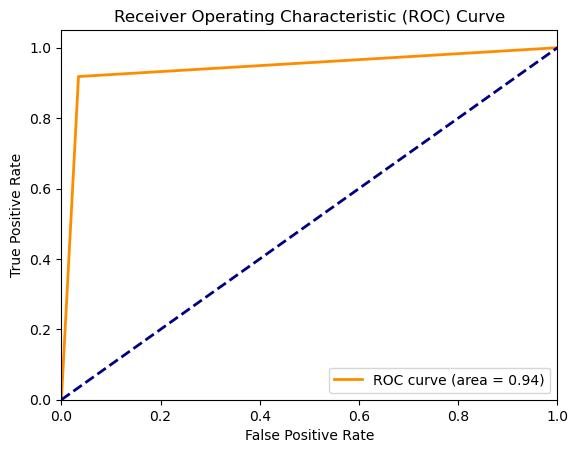

AUC Score: 0.9418495297805642


In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)


# **SMOTE Technique (Over-Sampling):**

SMOTE stands for **Synthetic Minority Over-sampling Technique**. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

**Understanding SMOTE:**

**Solving the Class Imbalance**: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

**Location of the synthetic points:** SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

**Final Effect**: More information is retained since we didn't have to delete any rows unlike in random undersampling.

**Accuracy || Time Tradeoff**: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X=data_fraud.drop("Class",axis=1)
y=data_fraud["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a model on the resampled data
model = LogisticRegression(max_iter=2000)
model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56869
           1       0.06      0.88      0.11        93

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



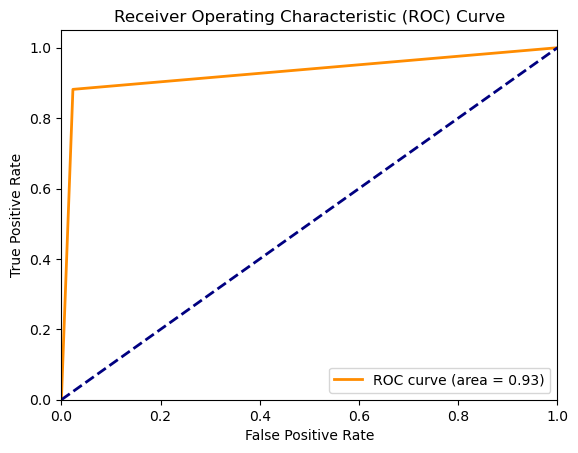

AUC Score: 0.9292633872565453


In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC Score:", auc_score)


# **Credit Card Fraud Detection Project**

**Preferred Model: Logistic Regression with SMOTE**

**Objective**

The primary objective of this project is to develop a credit card fraud detection model that accurately identifies fraudulent transactions while minimizing false positives.

**Model Selection**

Out of the various models considered, the preferred choice for this project is **Logistic Regression** due to its simplicity, interpretability, and suitability for binary classification tasks.

**Imbalance Handling: SMOTE Technique**

The highly imbalanced nature of the dataset, with a small fraction of fraudulent transactions, requires addressing class imbalance. The chosen technique for this purpose is

**SMOTE (Synthetic Minority Over-sampling Technique)**.

- SMOTE creates synthetic instances of the minority class to balance the dataset.
- It helps prevent the model from being biased towards the majority class.

**Steps for Logistic Regression with SMOTE**

1. **Data Preprocessing:**
   - Handle missing values and scale/normalize features.
   - Split the data into training and testing sets.

2. **SMOTE Resampling:**
   - Apply SMOTE to the training data to balance class distribution.
   - Generate synthetic instances of the minority class.

3. **Model Training:**
   - Train a **Logistic Regression** model on the resampled data.

4. **Hyperparameter Tuning:**
   - Use techniques like **GridSearchCV** to fine-tune the regularization parameter (`C`) for optimal performance.

5. **Model Evaluation:**
   - Evaluate the model's performance using metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix.
   - Pay attention to the false positive rate, as minimizing false positives is crucial.

6. **Interpretation and Visualization:**
   - Analyze feature importance to understand which features contribute most to fraud detection.

7. **Model Deployment:**
   - Deploy the trained Logistic Regression model into a real-time system or application.
   
**Benefits**

- Logistic Regression is well-suited for binary classification tasks and provides interpretable results.
- SMOTE helps address class imbalance and prevent biased model outcomes.
- The chosen approach aims to achieve high accuracy in detecting fraudulent transactions while minimizing false positives.

**Conclusion**

By utilizing Logistic Regression with the SMOTE technique, this project aims to deliver a reliable credit card fraud detection model that enhances financial security and protects customers from fraudulent activities.


# **RESULT**

The project aims to achieve a highly accurate and robust model that can effectively detect credit card fraud while maintaining a low false positive rate. The choice of the final model and its performance will be based on comprehensive evaluation metrics and domain-specific considerations.

By successfully developing and deploying a fraud detection model, the project contributes to enhancing financial security and minimizing the impact of fraudulent activities on credit card holders and financial institutions.